In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

import os

%matplotlib inline

# Part 1 - Basic Function (warmUpExercise)

In [2]:
A = np.eye(5)
print (A)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


# Part 2 - Linear regression with one variable

In [3]:
# Read data from txt file
FOLDER = 'data'
FILE = 'ex1data1.txt'
path = os.path.join(FOLDER, FILE)

data = pd.read_csv(path, header = None, names = ['x','y'])
data.head()

,x,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


## 2.1 Plotting the Data

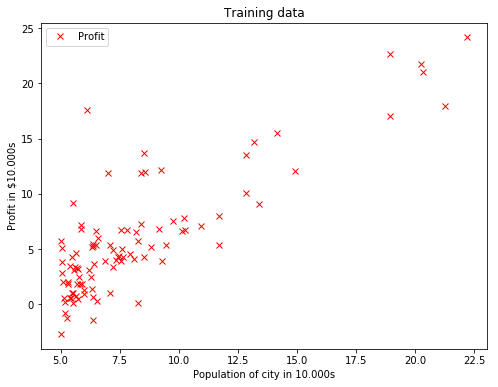

In [4]:
# Split the data to two variables
X = np.array(data['x'])
Y = np.array(data['y'])

# Number of training examples
m = X.shape[0]

# Plot from dataframe object
#data.plot(kind='scatter', x = 'x', y = 'y' )

# Plot from different column objects
plt.figure(figsize = (8,6))
plt.plot(X, Y, "x", label = 'Profit', c = 'r')
plt.xlabel('Population of city in 10.000s')
plt.ylabel('Profit in $10.000s')
plt.title('Training data')
plt.legend()
plt.show()

## 2.2 Gradient Descent

### 2.2.1 Update Equations

The objective of linear regression is to minimize the cost function $$ J(\theta)=\frac{1}{2m} \sum_{i=1}^m (h_{\theta}(x^{(i)})-y^{(i)})^2 $$ where the hypothesis $h_{\theta}(x)$ is given by the linear model
$$ h_{\theta}(x)=\theta^T x = \theta_0 + \theta_1 x_1 $$

### 2.2.2 Implementation

In [5]:
# Add x_0 to the X array
x_0 = np.ones(m)
X_aug = np.vstack((x_0,X)).T
X_aug[:5]

# Initialize thetas to 0s
theta = np.zeros((2,1))

# Set experiment variables
iterations = 1500
alpha = 0.01

### 2.2.3 Computing the cost $J(\theta)$

In [6]:
# Compute cost function

def computeCost(x, y, theta):
    # initialize usefull variables
    m = len(y)
    
    # calculate cost
    J = np.sum(np.square(np.dot(x,theta) - y)) / (2 * m)
    
    return J

In [7]:
# make sure X_aug and Y and theta have the correst shape


Y = Y.reshape(m,1)

print("The cost function for zero thetas is {0}".format(round(computeCost(X_aug,Y,theta),2)))
print("The cost function for thetas [-1,2] is {0}".format(round(computeCost(X_aug,Y,np.array([-1,2]).reshape(2,1)),2)))

The cost function for zero thetas is 32.07
The cost function for thetas [-1,2] is 54.24


### 2.2.4 Gradient descent

In [8]:
# create the Gradient Descent function

def gradientDescent(x, y, theta, alpha, num_iters):
    # initialize useful variables
    m = len(y)
    J_hist = np.zeros(num_iters)
    
    # iterate for num_iters times
    for i in range(num_iters):
        
        # perform a signle gradient step
        theta_new = (alpha/m) * np.sum((np.dot(x,theta) - y) * x, axis = 0).reshape(x.shape[1],1)
        theta -= theta_new
        
        # keep the cost function
        J_hist[i] = computeCost(x, y, theta)
        
    return J_hist, theta

The theta values resulting are: 
[[-3.63029144]
 [ 1.16636235]]


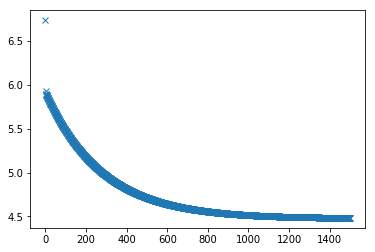

In [9]:
# Initialize thetas to 0s
theta = np.zeros((2,1))

# run the experiment
J_historical, theta_values = gradientDescent(X_aug, Y, theta, alpha, iterations)

# plot the cost function value over time
plt.plot(J_historical, "x", label = 'cost function')

# print resulting theta values
print("The theta values resulting are: \n{0}".format(theta_values))

## 2.3 Debugging

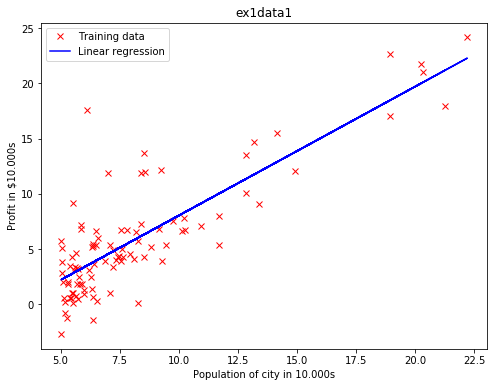

In [10]:
# plot the linear fit
plt.figure(figsize=(8,6))
plt.plot(X, Y, "x", label = 'Training data', color = 'r')
plt.plot(X, np.dot(X_aug,theta_values), "-", label = 'Linear regression', color = 'b')
plt.xlabel('Population of city in 10.000s')
plt.ylabel('Profit in $10.000s')
plt.title('ex1data1')
plt.legend()
plt.show()

In [11]:
# predictions for profits in areas of 35000 and 70000 people
predict1 = round(np.dot(np.array([1,35000]),theta_values)[0],2)
print("For 35000 people the profits are expected to be {0}".format(predict1))
predict2 = round(np.dot(np.array([1,70000]),theta_values)[0],2)
print("For 70000 people the profits are expected to be {0}".format(predict2))

For 35000 people the profits are expected to be 40819.05
For 70000 people the profits are expected to be 81641.73


## 2.4 - Visualizing $J(\theta)$

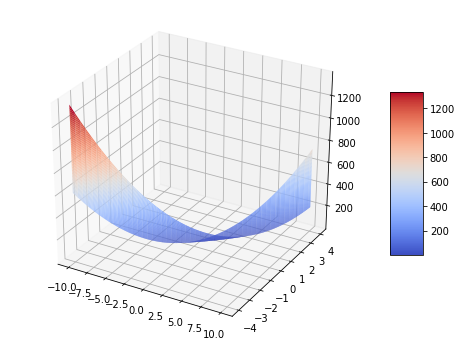

In [12]:
# Theta values over which we'll perform a grid search

theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-4, 4, 100)

# Initialize J values

J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Calculate J values for theta values
for ind_i, i in enumerate(theta0_vals):
    for ind_j, j in enumerate(theta1_vals):
        J_vals[ind_i, ind_j] = computeCost(X_aug, Y, np.array([[i],[j]]))

fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap=cm.coolwarm, linewidth=0, antialiased=True)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

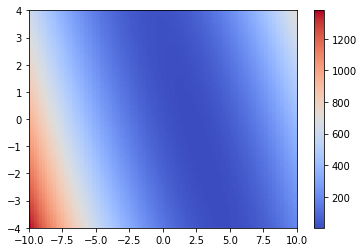

In [13]:
fig, ax = plt.subplots()

p = ax.pcolor(theta0_vals, theta1_vals, J_vals, cmap=cm.coolwarm)
cb = fig.colorbar(p)

# Part 3 - Linear regression with multiple variables

## 3.1 Feature Normalization

In [14]:
# Read data from txt file
FILE = 'ex1data2.txt'
path = os.path.join(FOLDER, FILE)
data = pd.read_csv(path, header = None, names = ['size','num_of_beds','price'])
data.head()

,size,num_of_beds,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [15]:
# Calculate the mean of each column
mean_data = data.mean()

# Calculate the standard deviation of each column
std_data = data.std()

In [16]:
# Normalize the features
data_scaled = ((data - mean_data)/std_data)
data_scaled.head()

,size,num_of_beds,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [17]:
# Create corresponding function
def featureNormalize(x):
    ''' Object must be a pandas dataframe'''
    mean = x.mean()
    std = x.std()
    
    x_norm = ((x - mean) / std)
    return mean, std, x_norm

In [18]:
# Find the number of training examples
m = data.shape[0]

# Add bias term to existing dataframe
data_scaled.insert(loc=0, column='bias', value=1)
data_scaled.head()

,bias,size,num_of_beds,price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


## 3.2 Gradient Descent

In [19]:
# Convert the Pandas dataframe to Numpy arrays
X_multi = data_scaled[['bias','size','num_of_beds']].values
Y_multi = data_scaled['price'].values.reshape(m,1)

In [20]:
def hypothesisValue(x, theta):
    assert x.shape[1] == theta.shape[0], "x and theta dimensions do not match for dot product"
    
    return np.dot(x,theta)

In [21]:
def computeCostMulti(x, y, theta):
    # Find the number of training examples
    m = len(y)
    
    assert x.shape[0] == m, "x and y dimensions do not match"
        
    J = np.sum(np.square(hypothesisValue(x, theta) - y))  / (2*m)
    
    return J

In [22]:
def gradientDescentMulti(x, y, theta, alpha, num_iters):
    m = len(y)
    J_hist = np.zeros(num_iters)
    
    for i in range(num_iters):
        theta_diff = (alpha / m) *np.sum((hypothesisValue(x, theta) - y) * x, axis = 0).reshape(theta.shape[0],1)
        
        theta -= theta_diff
        
        J_hist[i] = computeCostMulti(x, y, theta)
        
    return J_hist, theta

The theta values resulting are: 
[[-1.23287905e-16]
 [ 8.00441430e-01]
 [ 2.93790099e-02]]


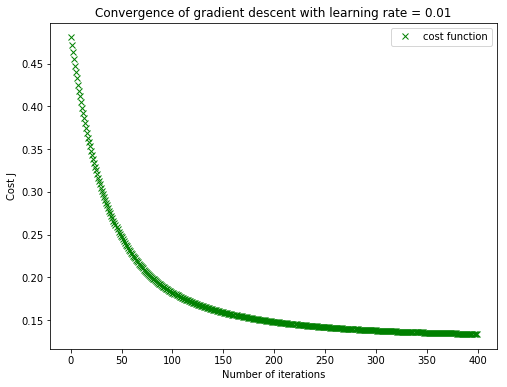

In [23]:
# Initialize variables for the experiment
alpha = 0.01
iters = 400

theta = np.zeros((3,1))

J_hist, theta = gradientDescentMulti(X_multi, Y_multi, theta, alpha, iters)

# plot the cost function value over time
plt.figure(figsize = (8,6))
plt.plot(J_hist, "x", label = 'cost function', color = 'g')

plt.title('Convergence of gradient descent with learning rate = {0}'.format(alpha))
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.legend()

# print resulting theta values
print("The theta values resulting are: \n{0}".format(theta))

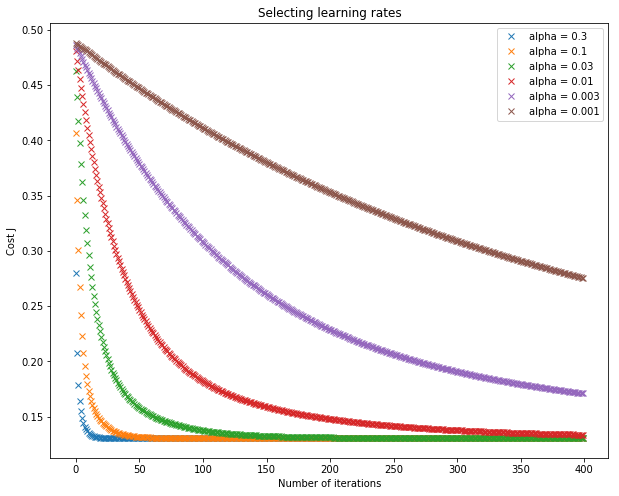

The theta values resulting are: 
[[-3.72468014e-17]
 [ 2.64365515e-01]
 [ 1.15909662e-01]]


In [24]:
plt.figure(figsize = (10,8))
for alpha in [0.3, 0.1, 0.03, 0.01, 0.003, 0.001]:
    
    theta = np.zeros((3,1))
    J_hist, theta = gradientDescentMulti(X_multi, Y_multi, theta, alpha, iters)
    
    # plot the cost function value over time
    plt.plot(J_hist, "x", label = 'alpha = {0}'.format(alpha))

plt.title('Selecting learning rates')
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.legend()
plt.show()

# print resulting theta values
print("The theta values resulting are: \n{0}".format(theta))